In [37]:
import glob
from des_helpers import encrypt, dec2bin, bin2hex, dpa_select_function
import numpy as np
import pandas as pd

# Path to the directory with CSV files
dataset_dir = "../HardwareData"
files = glob.glob(f"{dataset_dir}/ENC_DES_4096_*.npz")

data_des = dict(np.load(files[0]))
print(f"Loaded DES data from {files[0]}")
loaded_data = {
    'powertraces':[],
    'messages':[]
}
for i in range(4096):
    loaded_data[f'powertraces'].append(data_des[f'powertrace_{i}'])
    loaded_data[f'messages'].append(data_des[f'messages_{i}'])

Loaded DES data from ../HardwareData/ENC_DES_4096_trials_k=60.npz


In [42]:
# plaintexts = range(0, 2048)

powers_at_t = {}

# Find the minimum value in the entire dataset
# min_value = np.min(data_des)

for t in range(100):
    powers = []
    for pt_index, value in enumerate(loaded_data[f'messages']):
        power = loaded_data['powertraces'][pt_index][t]
        powers.append(power)
    
    powers_at_t[t]=powers

powers_at_t = pd.DataFrame(powers_at_t)

0: -3.0038359247503195
1: -2.129806797089941
2: -0.9592980465131404
3: -0.2943920253583201
4: -0.6558968789747723
5: 0.3749299941944173
6: -2.6973777476309806
7: 1.890204909287604
8: -2.7609748479781047
9: 0.20676633379389386
10: 0.5498523589781144
11: -1.0259476264784553
12: 0.19653171748768727
13: -0.14402277379144834
14: -0.5115810881206926
15: 2.403075844689056
16: -2.035770969853047
17: -1.6166118501441815
18: -2.6341547268373233
19: 1.0488096330848293
20: -0.7440823785641442
21: 0.30688375519594047
22: -1.351269045214849
23: 1.3908232491992294
24: 1.574094335281643
25: 0.6208836049920592
26: -2.0407761018241217
27: -2.6624309925744
28: -0.2748628792205636
29: -0.03930267184364311
30: -0.39039004171149827
31: -0.31519623679309916
32: -0.6729393139967215
33: -4.029039683665587
34: -0.41501134278837526
35: 1.4017681159766653
36: -2.2211568332700153
37: -3.1641246025851615
38: 1.1807347837955149
39: -1.173202171044295
40: 1.5025080496245664
41: 1.1221022841741615
42: 0.56514670522687

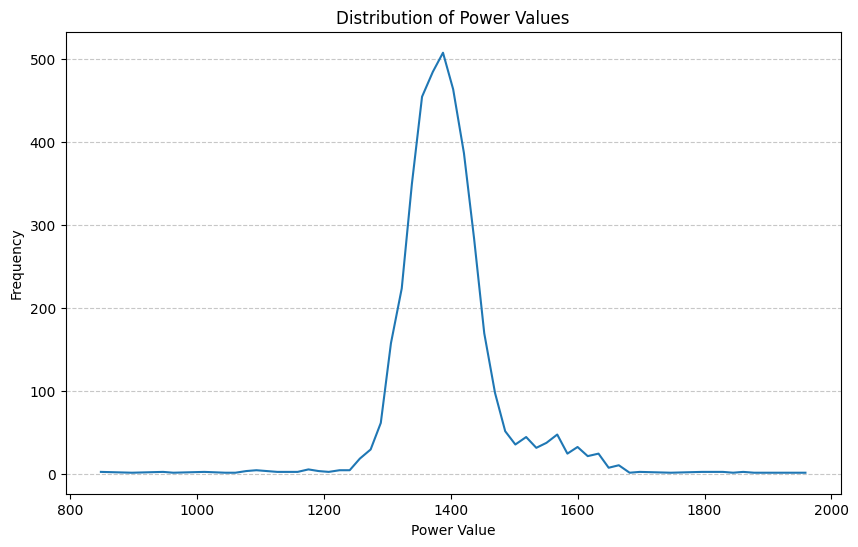

In [43]:
import matplotlib.pyplot as plt

key = 60
plaintexts = loaded_data['messages']

dom_at_t = []

for t in range(100):
    sel_values = np.array([dpa_select_function(f"{pt:016x}".upper(), key) for pt in plaintexts])

    # Partition the power traces based on selection values
    group0_indices = [i for i, val in enumerate(sel_values) if val == 0]
    group1_indices = [i for i, val in enumerate(sel_values) if val == 1]
    
    # Extract power traces for each group
    group0_powers = [powers_at_t[t][i] for i in group0_indices]
    group1_powers = [powers_at_t[t][i] for i in group1_indices]
    
    # Compute average power consumption for each group at the time point of interest
    avg_group0 = np.mean(group0_powers) if len(group0_powers) > 0 else 0
    avg_group1 = np.mean(group1_powers) if len(group1_powers) > 0 else 0
    
    # Compute the difference of means (DOM)
    dom = avg_group1 - avg_group0
    print(f"{t}: {dom}")
    dom_at_t.append(dom)

t = np.argmax(dom_at_t)
print(t)

# Sort the values by index (optional, for better visualization)
counts = powers_at_t[t].value_counts()

counts = counts.sort_index()

# Plot the value counts
plt.figure(figsize=(10, 6))
counts.plot(kind='line')
plt.title("Distribution of Power Values")
plt.xlabel("Power Value")
plt.ylabel("Frequency")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [46]:
trace_data = []
key = f"{60:016x}".upper()

# Append to the list
for index,pt in enumerate(plaintexts):
	trace = loaded_data['powertraces'][index]
	
	power_value = trace[t]

	plaintext = f"{pt:016x}".upper()
	ciphertext = bin2hex(encrypt(plaintext, key))

	trace_data.append({
		"Key": key,
		"Plaintext": plaintext,
		"Ciphertext": ciphertext,
		"Power": power_value
	})

# Convert to DataFrame for easier handling
trace_df = pd.DataFrame(trace_data)
trace_df.to_csv("des_extension_data.csv", index=False)

TypeError: unhashable type: 'numpy.ndarray'